In [13]:
# -*- coding: utf-8 -*-
"""
Created on Tue May 12 07:12:54 2020

@author: deepa
"""
import sys
import numpy as np
import random
import matplotlib.pyplot as plt

#a list of states
"""
states=[]
for i in range(0,4):
    for j in range(0,12):
        states.append((i,j))
"""

    
#a function returning the index corresponding to a state, for our Q_Value assistance
def getState(state): #state is in corrdinate format (i,j)
    return (state[0]*12)+state[1]

def getNextAction(Q_Values,stateIndex,randomProb=0.1): #including a randomness with probability randomProb which is to be very small
    if np.random.random() < randomProb:
        return np.random.choice(4)
    else:
        return np.random.choice(np.where(Q_Values[stateIndex] == Q_Values[stateIndex].max())[0]) #if there are many argmax it chooses a random out of them
        

"""

 0 is left
 1 is right
 2 is down 
 3 is up
 
"""
StartCoords = (3,0)
EndCoords = (3,11)

def nextStateRewardFn(state,action):
    i,j = state
    next_i = i
    next_j = j
    if(action==0 and j>0):
        next_j -= 1
    if(action==1 and j<11):
        next_j += 1
    if(action==2 and i<3 ):
        next_i += 1
    if(action==3 and i>0):
        next_i -= 1
    
    if(next_i==3 and next_j>=1 and next_j<11): #if next state is cliff we return startCoords with reward -100
        return ((StartCoords),-100)
    elif((next_i,next_j)==EndCoords): #if next state is endCoords the we return endCoords with reward 0
        return ((EndCoords),0)
    else:
        return ((next_i,next_j),-1) #else we return next state coordinates with reward -1
   


In [14]:
def Q_Learn(num_episodes,learningRateAlpha,gamma):    
    #have to reset Q_Values matrix to 0 in each episode
    Q_Values=np.zeros((48, 4))
    rewardList=[] #rewards for each  run
    numStepsList=[]
    for n in range(num_episodes):  
        state = StartCoords #initializing state as starting state
        stateVal=getState(state) #index of state
        rewardSum = 0
        numSteps=0
        while(stateVal!=getState(EndCoords)): #while state has not reached the end state
            action = getNextAction(Q_Values,stateVal) #choosing action
            nextState,reward = nextStateRewardFn(state,action)
            nextStateVal=getState(nextState) # StateVal updated to nextState index value
            rewardSum+=reward
            numSteps+=1
            td_target = reward + (gamma * np.max(Q_Values[nextStateVal]))
            td_error = td_target - Q_Values[stateVal][action]
            Q_Values[stateVal][action] += (learningRateAlpha * td_error)
            state = nextState
            stateVal=nextStateVal
            
        #append the sum of reward  to the rewardList after we have reached the end in one iteration of episode    
        rewardList.append(rewardSum)
        numStepsList.append(numSteps)
    return rewardList,Q_Values,numStepsList



In [15]:
def SARSA(num_episodes,learningRateAlpha,gamma):
    #have to reset Q_Values matrix to 0 in each episode
    Q_Values=np.zeros((48, 4))
    sarsRewardList=[] #rewards for each  run
    numStepsList=[]
    for n in range(num_episodes):
        state = StartCoords #initializing state as starting state
        stateVal=getState(state) #index of state
        rewardSum = 0
        numSteps=0
        action = getNextAction(Q_Values,stateVal) #choosing action
        while(stateVal!=getState(EndCoords)): #while state has not reached the end state
            nextState,reward = nextStateRewardFn(state,action)
            rewardSum+=reward
            numSteps+=1
            nextStateVal=getState(nextState) # StateVal updated to nextState 
            nextAction=getNextAction(Q_Values,nextStateVal)
            # Next q value is the value of the next action
            td_target = reward + gamma * Q_Values[nextStateVal][nextAction]
            td_error = td_target - Q_Values[stateVal][action]
            # Update q value
            Q_Values[stateVal][action] += learningRateAlpha * td_error
            state = nextState
            stateVal=nextStateVal
            action= nextAction
        sarsRewardList.append(rewardSum)
        numStepsList.append(numSteps)
    return sarsRewardList,Q_Values,numStepsList



In [16]:
def Q_Learn_partc(num_episodes,learningRateAlpha,gamma):    
    #have to reset Q_Values matrix to 0 in each episode
    Q_Values=np.zeros((48, 4))
    rewardList=[] #rewards for each  run
    numStepsList=[]
    for n in range(num_episodes):  
        state = StartCoords #initializing state as starting state
        stateVal=getState(state) #index of state
        rewardSum = 0
        numSteps=0
        epsilon = 0.1
        while(stateVal!=getState(EndCoords)): #while state has not reached the end state
            action = getNextAction(Q_Values,stateVal,epsilon) #choosing action
            nextState,reward = nextStateRewardFn(state,action)
            nextStateVal=getState(nextState) # StateVal updated to nextState index value
            rewardSum+=reward
            numSteps+=1
            td_target = reward + (gamma * np.max(Q_Values[nextStateVal]))
            td_error = td_target - Q_Values[stateVal][action]
            Q_Values[stateVal][action] += (learningRateAlpha * td_error)
            state = nextState
            stateVal=nextStateVal
        epsilon-=(epsilon/num_episodes)    
        #append the sum of reward  to the rewardList after we have reached the end in one iteration of episode    
        rewardList.append(rewardSum)
        numStepsList.append(numSteps)
        
    return rewardList,Q_Values,numStepsList

def SARSA_partc(num_episodes,learningRateAlpha,gamma):
    #have to reset Q_Values matrix to 0 in each episode
    Q_Values=np.zeros((48, 4))
    sarsRewardList=[] #rewards for each  run
    numStepsList=[]
    for n in range(num_episodes):
        state = StartCoords #initializing state as starting state
        stateVal=getState(state) #index of state
        rewardSum = 0
        numSteps=0
        epsilon = 0.1
        action = getNextAction(Q_Values,stateVal,epsilon) #choosing action
        while(stateVal!=getState(EndCoords)): #while state has not reached the end state
            nextState,reward = nextStateRewardFn(state,action)
            rewardSum+=reward
            numSteps+=1
            nextStateVal=getState(nextState) # StateVal updated to nextState 
            nextAction=getNextAction(Q_Values,nextStateVal,epsilon)
            # Next q value is the value of the next action
            td_target = reward + gamma * Q_Values[nextStateVal][nextAction]
            td_error = td_target - Q_Values[stateVal][action]
            # Update q value
            Q_Values[stateVal][action] += learningRateAlpha * td_error
            state = nextState
            stateVal=nextStateVal
            action= nextAction
        sarsRewardList.append(rewardSum)
        numStepsList.append(numSteps)
        epsilon-=(epsilon/num_episodes)
    return sarsRewardList,Q_Values,numStepsList

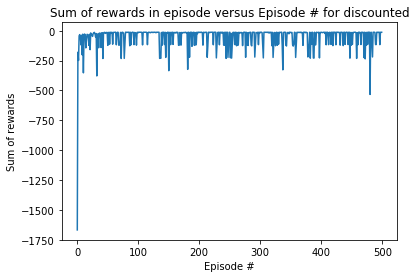

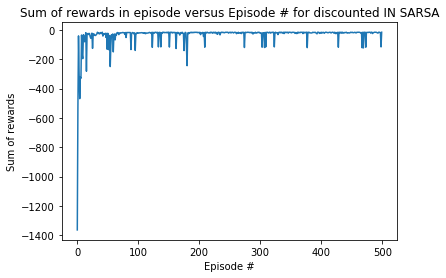

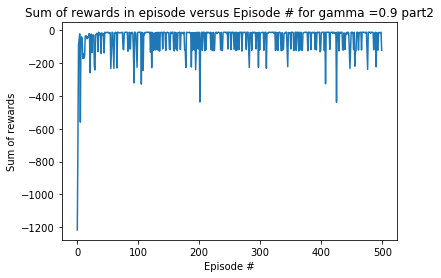

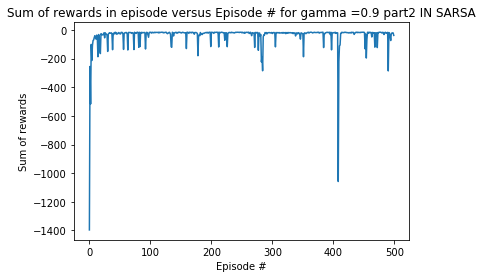

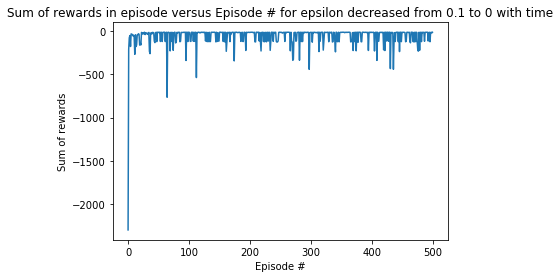

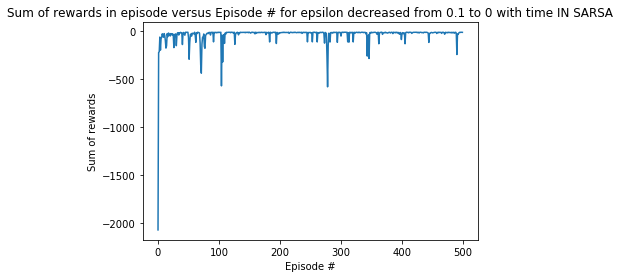

In [17]:
numEpisodes=500

unDis_R,unDis_Q,unDis_S =Q_Learn(numEpisodes,0.5,1)
plt.plot(range(0,numEpisodes),unDis_R)
plt.xlabel('Episode #')
plt.ylabel('Sum of rewards')
plt.title('Sum of rewards in episode versus Episode # for discounted')
plt.show()
unDisSAR_R,unDisSAR_Q,unDisSAR_S =SARSA(numEpisodes,0.5,1)
plt.plot(range(0,numEpisodes),unDisSAR_R)
plt.xlabel('Episode #')
plt.ylabel('Sum of rewards')
plt.title('Sum of rewards in episode versus Episode # for discounted IN SARSA')
plt.show()

mid_R,mid_Q,mid_S =Q_Learn(numEpisodes,0.5,0.9)
plt.plot(range(0,numEpisodes),mid_R)
plt.xlabel('Episode #')
plt.ylabel('Sum of rewards')
plt.title('Sum of rewards in episode versus Episode # for gamma =0.9 part2')
plt.show()
midSAR_R,midSAR_Q,midSAR_S =SARSA(numEpisodes,0.5,0.9)
plt.plot(range(0,numEpisodes),midSAR_R)
plt.xlabel('Episode #')
plt.ylabel('Sum of rewards')
plt.title('Sum of rewards in episode versus Episode # for gamma =0.9 part2 IN SARSA')
plt.show()

unDisLast_R,unDisLast_Q,unDisLast_S =Q_Learn_partc(numEpisodes,0.5,0.9)
plt.plot(range(0,numEpisodes),unDisLast_R)
plt.xlabel('Episode #')
plt.ylabel('Sum of rewards')
plt.title('Sum of rewards in episode versus Episode # for epsilon decreased from 0.1 to 0 with time')
plt.show()
unDisLastSAR_R,unDisLastSAR_Q,unDisLastSAR_S =SARSA_partc(numEpisodes,0.5,0.9)
plt.plot(range(0,numEpisodes),unDisLastSAR_R)
plt.xlabel('Episode #')
plt.ylabel('Sum of rewards')
plt.title('Sum of rewards in episode versus Episode # for epsilon decreased from 0.1 to 0 with time IN SARSA')
plt.show()


In [18]:
       
def plotPolicy(qValues):
    a=0
    while a!=48:
        if a==47:
            print("End", end =" ")
        else:
            action= np.argmax(qValues[a]) 
            if action==0:
                print("<", end =" ")
            if action==1:
                print(">", end =" ")
            if action==2:
                print("v", end =" ")
            if action==3:
                print("^", end =" ")
        a+=1
        if a%12 == 0:
            print("")


In [19]:
#FOR PART A 
print("Q-Learning")
plotPolicy(unDis_Q)
print("reward: ",np.mean(unDis_R))
print("Steps: ",np.mean(unDis_S))

print("SARSA")
plotPolicy(unDisSAR_Q)
print("reward: ",np.mean(unDisSAR_R))
print("Steps: ",np.mean(unDisSAR_S))



Q-Learning
^ > > > v > > > > > v v 
> > > > > > v > > v v v 
> > > > > > > > > > > v 
^ < < < < < < < < < < End 
reward:  -54.794
Steps:  19.956
SARSA
> > > > > > > > > > v v 
> ^ > > ^ > > ^ ^ ^ > v 
^ < ^ ^ ^ < ^ < > > > v 
^ < < < < < < < < < < End 
reward:  -34.416
Steps:  24.922


In [20]:
#FOR PART B
print("Q-Learning")
plotPolicy(mid_Q)
print("reward: ",np.mean(mid_R))
print("Steps: ",np.mean(mid_S))

print("SARSA")
plotPolicy(midSAR_Q)
print("reward: ",np.mean(midSAR_R))
print("Steps: ",np.mean(midSAR_S))



Q-Learning
> v < > v v > > > > > v 
> > > v > > > > v > v v 
> > > > > > > > > > > v 
^ < < < < < < < < < < End 
reward:  -55.306
Steps:  20.468
SARSA
> > > v > > > > > > > v 
^ < ^ > > > ^ > ^ ^ > v 
^ ^ ^ ^ ^ ^ < < ^ < > v 
^ < < < < < < < < < < End 
reward:  -37.76
Steps:  29.454


In [21]:
#FOR PART C
print("Q-Learning")
plotPolicy(unDisLast_Q)
print("reward: ",np.mean(unDisLast_R))
print("Steps: ",np.mean(unDisLast_S))

print("SARSA")
plotPolicy(unDisLastSAR_Q)
print("reward: ",np.mean(unDisLastSAR_R))
print("Steps: ",np.mean(unDisLastSAR_S))



Q-Learning
v > v < v > > v > v v v 
^ > > v > > > > v v > v 
> > > > > > > > > > > v 
^ < < < < < < < < < < End 
reward:  -59.996
Steps:  20.604
SARSA
> > > > > > > > > > v v 
^ < > ^ v ^ ^ ^ ^ ^ > v 
^ ^ ^ ^ ^ ^ ^ ^ ^ ^ > v 
^ < < < < < < < < < < End 
reward:  -41.462
Steps:  32.76


In [22]:
#FOR GREEDY POLICIES
def getNextgreedyAction(Q_Values,stateIndex):
    return np.random.choice(np.where(Q_Values[stateIndex] == Q_Values[stateIndex].max())[0]) #if there are many argmax it chooses a random out of them

def SARSAGreedy(num_episodes,learningRateAlpha,gamma):
    #have to reset Q_Values matrix to 0 in each episode
    Q_Values=np.zeros((48, 4))
    sarsRewardList=[] #rewards for each  run
    numStepsList=[]
    for n in range(num_episodes):
        state = StartCoords #initializing state as starting state
        stateVal=getState(state) #index of state
        rewardSum = 0
        numSteps=0
        action = getNextgreedyAction(Q_Values,stateVal) #choosing action
        while(stateVal!=getState(EndCoords)): #while state has not reached the end state
            nextState,reward = nextStateRewardFn(state,action)
            rewardSum+=reward
            numSteps+=1
            nextStateVal=getState(nextState) # StateVal updated to nextState 
            nextAction=getNextgreedyAction(Q_Values,nextStateVal)
            # Next q value is the value of the next action
            td_target = reward + gamma * Q_Values[nextStateVal][nextAction]
            td_error = td_target - Q_Values[stateVal][action]
            # Update q value
            Q_Values[stateVal][action] += learningRateAlpha * td_error
            state = nextState
            stateVal=nextStateVal
            action= nextAction
        sarsRewardList.append(rewardSum)
        numStepsList.append(numSteps)
    return sarsRewardList,Q_Values,numStepsList

def Q_LearnGreedy(num_episodes,learningRateAlpha,gamma):    
    #have to reset Q_Values matrix to 0 in each episode
    Q_Values=np.zeros((48, 4))
    rewardList=[] #rewards for each  run
    numStepsList=[]
    for n in range(num_episodes):  
        state = StartCoords #initializing state as starting state
        stateVal=getState(state) #index of state
        rewardSum = 0
        numSteps=0
        while(stateVal!=getState(EndCoords)): #while state has not reached the end state
            action = getNextgreedyAction(Q_Values,stateVal) #choosing action
            nextState,reward = nextStateRewardFn(state,action)
            nextStateVal=getState(nextState) # StateVal updated to nextState index value
            rewardSum+=reward
            numSteps+=1
            td_target = reward + (gamma * np.max(Q_Values[nextStateVal]))
            td_error = td_target - Q_Values[stateVal][action]
            Q_Values[stateVal][action] += (learningRateAlpha * td_error)
            state = nextState
            stateVal=nextStateVal
            
        #append the sum of reward  to the rewardList after we have reached the end in one iteration of episode    
        rewardList.append(rewardSum)
        numStepsList.append(numSteps)
        
    return rewardList,Q_Values,numStepsList



In [23]:
greedy_R,greedy_Q,greedy_S =Q_LearnGreedy(numEpisodes,0.5,1)
greedySARSA_R,greedySARSA_Q,greedySARSA_S =SARSAGreedy(numEpisodes,0.5,1)

print("Q-Learning GREEDY")
plotPolicy(greedy_Q)
print("reward: ",np.mean(greedy_R))
print("steps: ",np.mean(greedy_S))

print("SARSA GREEDY")
plotPolicy(greedySARSA_Q)
print("reward: ",np.mean(greedySARSA_R))
print("steps: ",np.mean(greedySARSA_S))


Q-Learning GREEDY
< ^ ^ > > > > < > v v v 
> v > > > > v > > v v v 
> > > > > > > > > > > v 
^ < < < < < < < < < < End 
reward:  -17.32
steps:  16.142
SARSA GREEDY
v > > > > < > > > < > ^ 
> v > > ^ > > v > > v v 
> > > > > > > > > > > v 
^ < < < < < < < < < < End 
reward:  -17.468
steps:  16.29
